# Data Focused Python

### Week 5. Graphics

#### Introduction to Graphics

In [133]:
# install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

In [134]:
# read in a dataset
df_faith = pd.read_csv('datasets/faithful.csv')
# take a look at the dataset
df_faith.head()

,eruptions,wait_time
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0


(array([16., 28., 26., 24.,  9., 23., 61., 53., 23.,  6.]),
 array([43. , 48.3, 53.6, 58.9, 64.2, 69.5, 74.8, 80.1, 85.4, 90.7, 96. ]),
 <BarContainer object of 10 artists>)

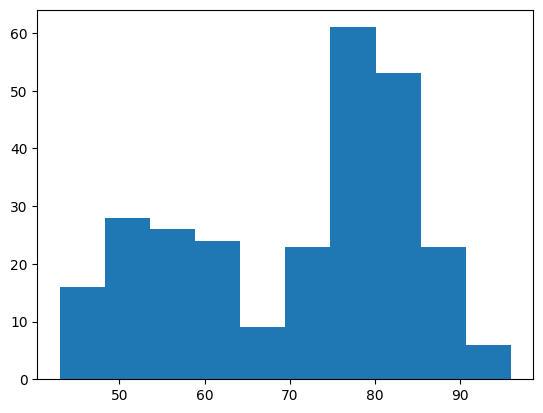

In [135]:
# build a simple histogram with matplotlib
plt.hist(df_faith['wait_time'])

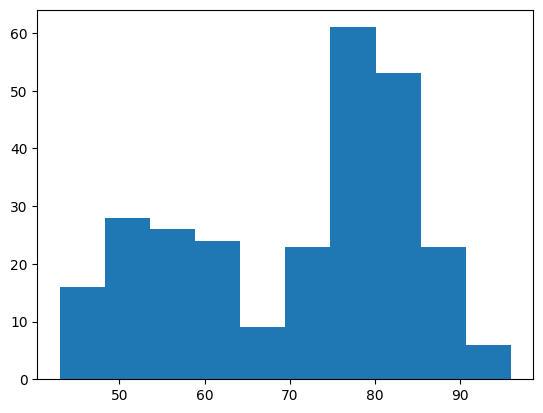

In [136]:
# notice the histogram array details are printed above the graph
# that can be eliminated with a ; at the end of the line
# or also by using plt.show()
# build a simple histogram with matplotlib
plt.hist(df_faith['wait_time']);

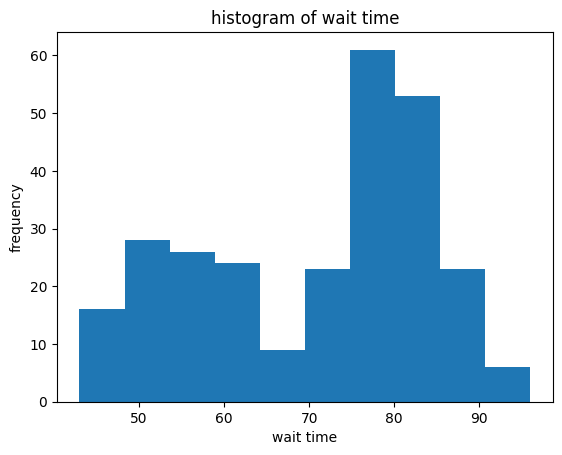

In [137]:
# object oriented method
# create the figure and axis object
fig, ax = plt.subplots()
ax.hist(df_faith['wait_time'])

# adding labels and title
ax.set_xlabel('wait time')
ax.set_ylabel('frequency')
ax.set_title('histogram of wait time')

# display the plot
plt.show()

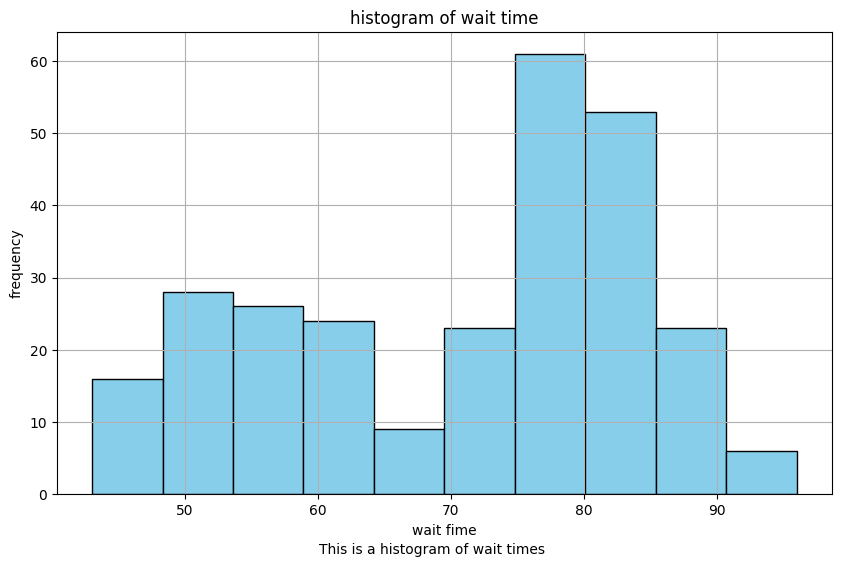

In [138]:
# adjust figure size, add text and save the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_faith['wait_time'], color='skyblue', edgecolor='black')
ax.set_xlabel('wait fime')
ax.set_ylabel('frequency')
ax.set_title('histogram of wait time')
ax.grid(True)
fig.text(0.5, 0.01, 'This is a histogram of wait times', ha='center')
# # save the figure as a PNG file
# fig.savefig('histogram.png')
plt.show()

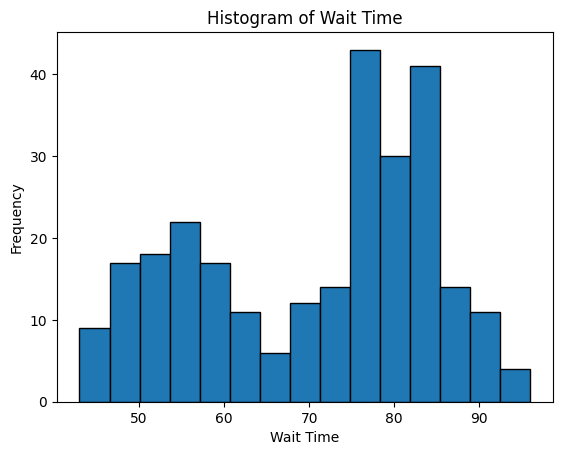

In [139]:
# a more detailed histogram
plt.hist(df_faith['wait_time'], bins=15, edgecolor='black')
# add titles and labels
plt.title('Histogram of Wait Time')
plt.xlabel('Wait Time')
plt.ylabel('Frequency')
plt.show()

In [141]:
# read flights23
df_flights = pd.read_csv('datasets/flights23.csv')

In [142]:
# take a look at the flights dataset
df_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500,20,38
1,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760,23,0
2,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576,23,44
3,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636,21,40
4,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488,20,48


Most of the columns are numeric, but origin is categorical.  
Create a barplot counting the number of each unique origin entry.

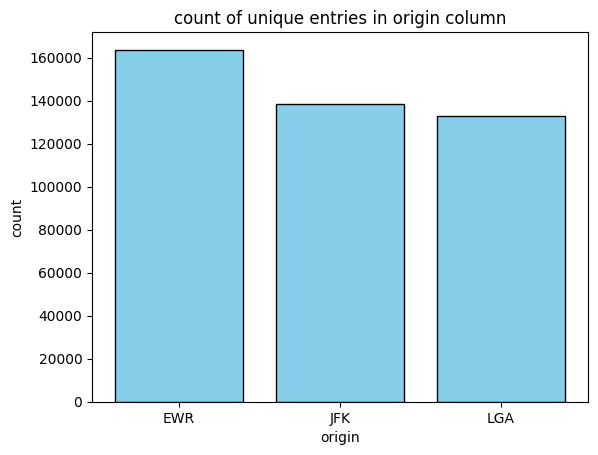

In [149]:
# make a barplot of the origin column counts
# count the unique entries in the 'dest' column
dest_counts = df_flights['origin'].value_counts()
# create the bar plot
plt.bar(x = df_flights['origin'].unique(),
        height = df_flights['origin'].value_counts(),
        color='skyblue', edgecolor='black')
plt.title('count of unique entries in origin column')
plt.xlabel('origin')
plt.ylabel('count')
plt.show()

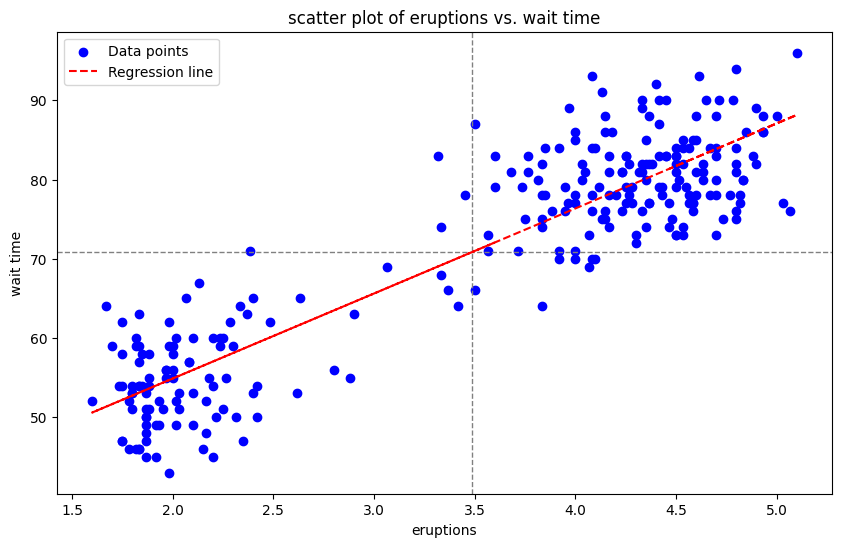

In [150]:
# Scatterplot of Faithful data with some extra features

# drop rows with missing values
df_faith = df_faith.dropna()

# calculate mean values
mean_eruptions = df_faith['eruptions'].mean()
mean_wait_time = df_faith['wait_time'].mean()

# set the size of the plot
plt.figure(figsize=(10, 6))

# create the scatter plot
plt.scatter(df_faith['eruptions'], df_faith['wait_time'], color='blue', label='Data points')

# add horizontal and vertical lines at the mean values
plt.axhline(y=mean_wait_time, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=mean_eruptions, color='gray', linestyle='--', linewidth=1)

# calculate the regression line
coefficients = np.polyfit(df_faith['eruptions'], df_faith['wait_time'], 1)
slope, intercept = coefficients

# generate the regression line values
regression_line = slope * np.array(df_faith['eruptions']) + intercept

# plot the regression line
plt.plot(df_faith['eruptions'], regression_line, color='red', linestyle='--', label='Regression line')

# add titles and labels
plt.title('scatter plot of eruptions vs. wait time')
plt.xlabel('eruptions')
plt.ylabel('wait time')
plt.legend()
plt.show()

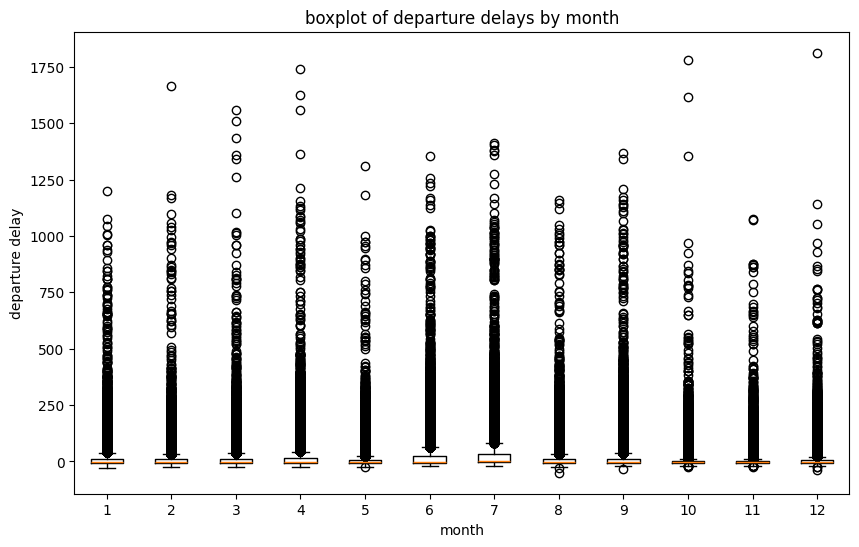

In [151]:
# group flights dep_delay by month and make a boxplot
df_flights = df_flights.dropna()
grouped_data = df_flights.groupby('month')['dep_delay'].apply(list)
# create a boxplot of dep_delay grouped by month
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, tick_labels=grouped_data.index)
plt.title('boxplot of departure delays by month')
plt.xlabel('month')
plt.ylabel('departure delay')
plt.show()

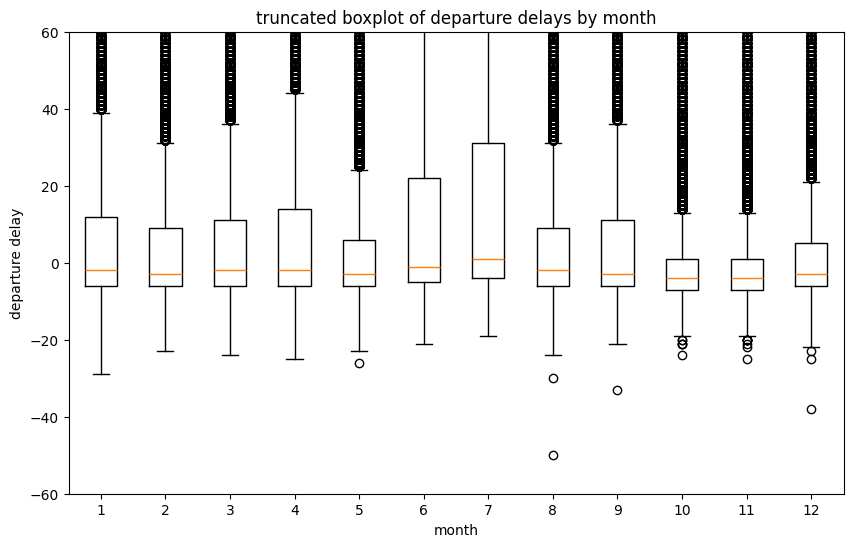

In [152]:
# group flights dep_delay by month and make a boxplot
df_flights = df_flights.dropna()
grouped_data = df_flights.groupby('month')['dep_delay'].apply(list)
# create a boxplot of dep_delay grouped by month
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, tick_labels=grouped_data.index)
plt.ylim(-60, 60)
plt.title('truncated boxplot of departure delays by month')
plt.xlabel('month')
plt.ylabel('departure delay')
plt.show()

In [153]:
# basic plotly scatterplot
# read dataset
diamonds = pd.read_csv('datasets/diamonds.csv')
# create plot
fig = px.scatter(diamonds, x='carat', y='price', 
                 title='price vs carat', 
                 color_discrete_sequence=['red'])
# update the layout to change the size of the graph
fig.update_layout(
    width=1000, 
    height=600,
    plot_bgcolor='lightgray',  # Background color of the plot area
    paper_bgcolor='lightblue'  # Background color of the entire figure
)
# show the plot
fig.show()

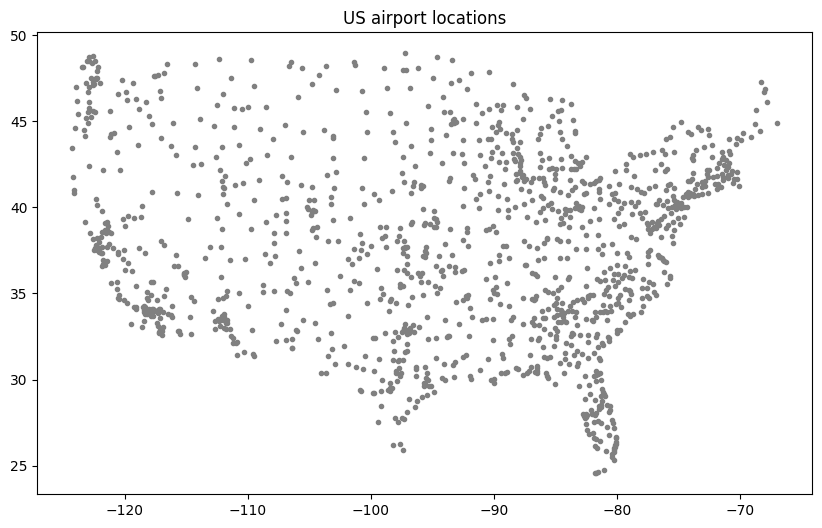

In [156]:
# read usairports dataset
usa = pd.read_csv('datasets/USairports.csv')

# simple scatterplot only
plt.figure(figsize=(10, 6))
# create the scatter plot
plt.scatter(usa['long'], usa['lat'], color='gray', marker ='.')
plt.title('US airport locations')
plt.show()

#### Generating maps

In [155]:
map = folium.Map(location=(39, -98), zoom_start=4)
map

### Week 6. OOP Programming

defining and using classes   
classes are usually capitalized

In [157]:
# define a class called country
class Country:
    def __init__(self, name, capital, population, area, continent):
        self.name = name
        self.capital = capital
        self.population = population
        self.area = area
        self.continent = continent
        # object instantiating - referencing itself. so it's slef. Python is structured this way
        # referencing that class object

    def display_info(self):
        print(f"Country: {self.name}")
        print(f"Capital: {self.capital}")
        print(f"Population: {self.population}")
        print(f"Area: {self.area} sq km")
        print(f"Continent: {self.continent}")

    def update_population(self, new_population):
        self.population = new_population
        print(f"The population of {self.name} has been updated to {self.population}.")

In [158]:
# here is one example of a docstring for the Country class

"""
A class to represent a country.

Attributes
----------
name : str
    The name of the country.
capital : str
    The capital city of the country.
population : int
    The population of the country.
area : float
    The total area of the country in square kilometers.
continent : str
    The continent where the country is located.

Methods
-------
display_info():
    Prints the details of the country.
update_population(new_population):
    Updates the population of the country.
"""

'\nA class to represent a country.\n\nAttributes\n----------\nname : str\n    The name of the country.\ncapital : str\n    The capital city of the country.\npopulation : int\n    The population of the country.\narea : float\n    The total area of the country in square kilometers.\ncontinent : str\n    The continent where the country is located.\n\nMethods\n-------\ndisplay_info():\n    Prints the details of the country.\nupdate_population(new_population):\n    Updates the population of the country.\n'

In [159]:
# example usage:
usa = Country(name="United States", capital="Washington, D.C.", population=331002651, area=9833520, continent="North America")
usa.display_info()

Country: United States
Capital: Washington, D.C.
Population: 331002651
Area: 9833520 sq km
Continent: North America


In [160]:
# include information for Mexico and Canada
mexico = Country(name="Mexico", capital="Mexico City", population=128932753, area=1964375, continent="North America")
canada = Country(name="Canada", capital="Ottawa", population=37742154, area=9984670, continent="North America")

In [161]:
mexico.display_info()

Country: Mexico
Capital: Mexico City
Population: 128932753
Area: 1964375 sq km
Continent: North America


In [162]:
# update the usa population
usa.update_population(332000000)
# overwirtes to new value

The population of United States has been updated to 332000000.


In [163]:
# now display the newly added information
usa.display_info()

Country: United States
Capital: Washington, D.C.
Population: 332000000
Area: 9833520 sq km
Continent: North America


In [164]:
# it gives an error becasue we did not define japan
japan.display_info()

NameError: name 'japan' is not defined

In [165]:
class Planet:
    def __init__(self, name, diameter, mass, distance_from_sun, number_of_moons):
        self.name = name
        self.diameter = diameter  # in kilometers
        self.mass = mass  # in kilograms
        self.distance_from_sun = distance_from_sun  # in million kilometers
        self.number_of_moons = number_of_moons

    def display_info(self):
        print(f"Planet: {self.name}")
        print(f"Diameter: {self.diameter} km")
        print(f"Mass: {self.mass} kg")
        print(f"Distance from Sun: {self.distance_from_sun} million km")
        print(f"Number of Moons: {self.number_of_moons}")

    def update_number_of_moons(self, new_number_of_moons):
        self.number_of_moons = new_number_of_moons
        print(f"The number of moons of {self.name} has been updated to {self.number_of_moons}.")

In [166]:
# example usage:
# instantiating the object 'earth'
earth = Planet(name="Earth", diameter=12742, mass=5.972e24, distance_from_sun=149.6, number_of_moons=1)
earth.display_info()

Planet: Earth
Diameter: 12742 km
Mass: 5.972e+24 kg
Distance from Sun: 149.6 million km
Number of Moons: 1


In [167]:
# update the number of moons
earth.update_number_of_moons(2)

The number of moons of Earth has been updated to 2.


In [168]:
# now display the newly added information
earth.display_info()

Planet: Earth
Diameter: 12742 km
Mass: 5.972e+24 kg
Distance from Sun: 149.6 million km
Number of Moons: 2


#### Time Series Analysis

Formatting times and time series analysis

In [169]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX

ISO time, or UNIX time, is how computers deal with dates and times, in the format year-month-day.

The pd.to_datetime function:
pd.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=False, format=None, exact=<no_default>, unit=None, infer_datetime_format=<no_default>, origin='unix', cache=True)

pd.to_datetime can often interpret date times correctly with no assistance, but some dates may be in an odd format, inconsistent or custom formatted. You can prompt the function to read dates correctly.

In [170]:
# simple date only example
date_str = '2024-10-03'
date_obj = pd.to_datetime(date_str)
print(date_obj)
# print date only
print(date_obj.date())
# print year only
print(date_obj.year)
# print day of week Monday = 0, Sunday = 6
print(date_obj.dayofweek)
# print day of year
print(date_obj.dayofyear)

2024-10-03 00:00:00
2024-10-03
2024
3
277


In [171]:
# more detailed date and time example
datetime_str = '2024-10-03 12:45:38'
datetime_obj = pd.to_datetime(datetime_str)
print(datetime_obj)

2024-10-03 12:45:38


In [172]:
# not iso date format
# this date is ambiguous - it could be Feb 10 or 2 Oct
# let's call it 2 Oct
custom_date_str = '02-10-2024'
custom_date_obj = pd.to_datetime(custom_date_str, format='%d-%m-%Y') # what order to show
print(custom_date_obj)

2024-10-02 00:00:00


In [173]:
# using format with correct structure
mixed_date_series = pd.Series(['2024/10/01', 'not a datetime', '2024/10/03'])
mixed_date_series_obj = pd.to_datetime(mixed_date_series,
                                       format='%Y/%m/%d', 
                                       errors='coerce')
print(mixed_date_series_obj)

0   2024-10-01
1          NaT
2   2024-10-03
dtype: datetime64[ns]


In [174]:
# using 'mixed' format, which often works, but could be dangerous
mixed_date_series = pd.Series(['2024/10/01', '2024-10-02', '10/03/2024'])
mixed_date_series_obj = pd.to_datetime(mixed_date_series,
                                       format='mixed', 
                                       errors='coerce')
print(mixed_date_series_obj)

0   2024-10-01
1   2024-10-02
2   2024-10-03
dtype: datetime64[ns]


In [176]:
# import dataset and format the date
df = pd.read_csv('air_passengers.csv')

In [177]:
df.head()

,date,miles
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


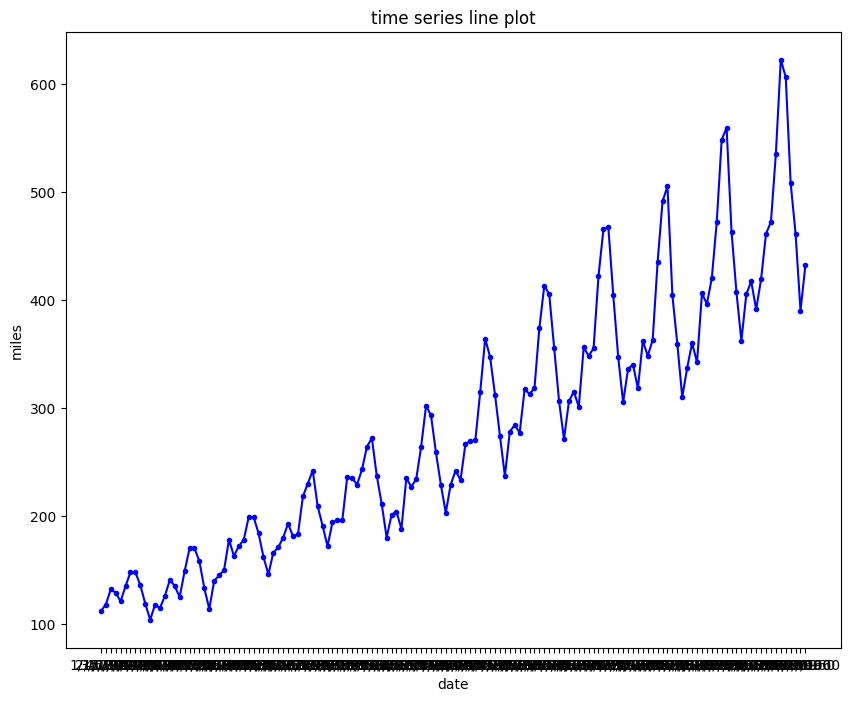

In [178]:
# plot time series
plt.figure(figsize=(10,8))
# simple line plot
plt.plot(df['date'],df['miles'], 
         marker='.', color='blue')
plt.title('time series line plot')
plt.xlabel('date')
plt.ylabel('miles')
plt.show()

In [179]:
# convert the date with the correct format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

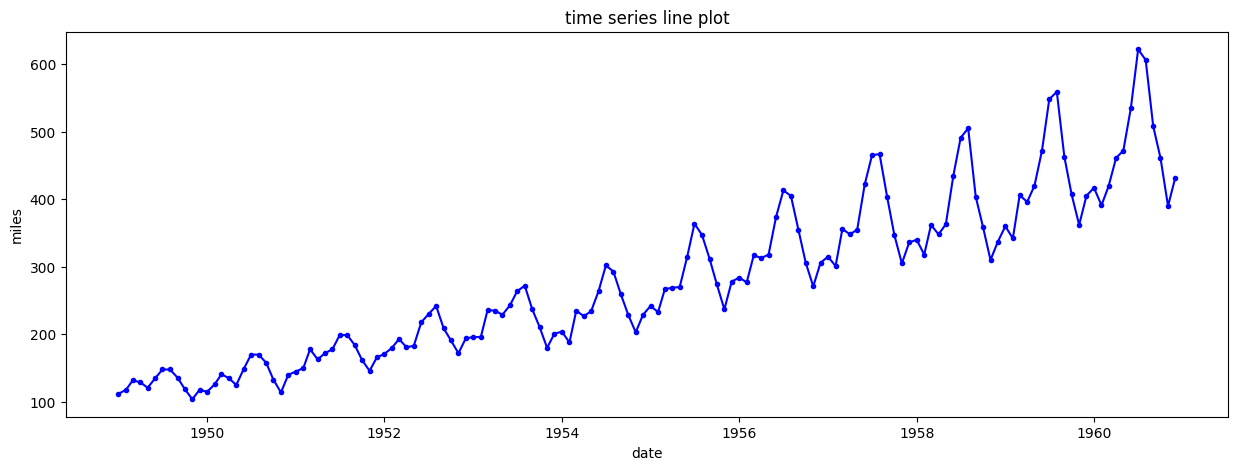

In [180]:
# plot time series
plt.figure(figsize=(15,5))
# simple line plot
plt.plot(df['date'],df['miles'], 
         marker='.', color='blue')
plt.title('time series line plot')
plt.xlabel('date')
plt.ylabel('miles')
plt.show()

In [181]:
# remove 1960 from the dataset and try to predict 1960
dfs = df[:132]

In [182]:
# perform the Augmented Dickey-Fuller test for stationarity check
result = adfuller(dfs['miles'])

# extract and display the test results
print('ADF statistic:', result[0])  
print('p-value:', result[1])  
print('critical values:')  
for key, value in result[4].items():
    print(f'   {key}: {value}')

# interpret results
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF statistic: 0.8880265130075063
p-value: 0.9929320626482829
critical values:
   1%: -3.4870216863700767
   5%: -2.8863625166643136
   10%: -2.580009026141913
The time series is not stationary.


In [183]:
# fit an AR model
model = AutoReg(dfs['miles'], lags=12).fit()

# examine model summary
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  miles   No. Observations:                  132
Model:                    AutoReg(12)   Log Likelihood                -477.032
Method:               Conditional MLE   S.D. of innovations             12.888
Date:                Tue, 07 Jan 2025   AIC                            982.064
Time:                        02:20:38   BIC                           1021.089
Sample:                            12   HQIC                           997.912
                                  132                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1990      3.668      2.780      0.005       3.009      17.389
miles.L1       0.5390      0.082      6.543      0.000       0.378       0.701
miles.L2      -0.3436      0.089     -3.844      0.0

In [184]:
# predict the next 12 data points
predictions = model.predict(start=len(df), end=len(df) + 11, dynamic=False)

# print predictions
print(predictions)

144    428.319953
145    423.238799
146    449.263848
147    460.430884
148    507.986678
149    557.729154
150    648.877933
151    659.470893
152    593.731954
153    509.588571
154    452.922282
155    479.390399
dtype: float64


In [185]:
# create dataframe for 1960
date_range = pd.date_range(start='1960-01-01', periods=12, freq='MS')
p_df = pd.DataFrame({'date': date_range, 'predicted_miles': predictions})
p_df.set_index('date', inplace=True)

In [186]:
p_df

,predicted_miles
date,
1960-01-01,428.319953
1960-02-01,423.238799
1960-03-01,449.263848
1960-04-01,460.430884
1960-05-01,507.986678
1960-06-01,557.729154
1960-07-01,648.877933
1960-08-01,659.470893
1960-09-01,593.731954


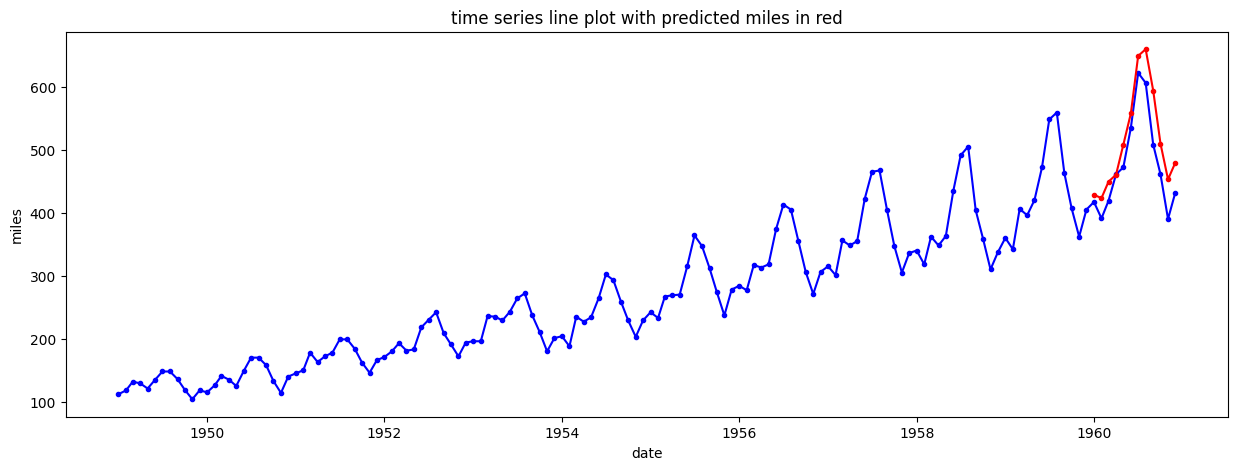

In [187]:
# plot time series with predictions
plt.figure(figsize=(15,5))
# simple line plot
plt.plot(df['date'],df['miles'], 
         marker='.', color='blue')
plt.plot(p_df.index, p_df['predicted_miles'],
         marker='.', color='red')
plt.title('time series line plot with predicted miles in red')
plt.xlabel('date')
plt.ylabel('miles')
plt.show()

In [188]:
# try a SARIMA model
# define a SARIMA model
# (p, d, q) are the non-seasonal parameters
# (P, D, Q, s) are the seasonal parameters
model = SARIMAX(dfs['miles'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# fit the model
sarima_model = model.fit(maxiter=1000, method='powell')
# sarima_model = model.fit()

# print model summary
print(sarima_model.summary())

Optimization terminated successfully.
         Current function value: 3.388889
         Iterations: 2
         Function evaluations: 106
                                     SARIMAX Results                                      
Dep. Variable:                              miles   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -447.333
Date:                            Tue, 07 Jan 2025   AIC                            904.667
Time:                                    02:20:59   BIC                            918.562
Sample:                                         0   HQIC                           910.309
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

In [189]:
# predict the next 12 data points
predictions = sarima_model.get_forecast(steps=12)
predicted_mean = predictions.predicted_mean

# generate the date range for the predictions
date_range = pd.date_range(start='1960-01-01', periods=12, freq='MS')

# create a dataframe with the predictions and the date range
predictions_df = pd.DataFrame({'date': date_range, 'predicted_miles': predicted_mean})

# set the date column as the index
predictions_df.set_index('date', inplace=True)

# print the dataframe
print(predictions_df)

            predicted_miles
date                       
1960-01-01       424.568470
1960-02-01       408.022644
1960-03-01       470.202188
1960-04-01       460.648289
1960-05-01       483.775058
1960-06-01       536.857960
1960-07-01       611.608566
1960-08-01       622.663420
1960-09-01       526.847037
1960-10-01       471.302925
1960-11-01       426.189473
1960-12-01       468.477327


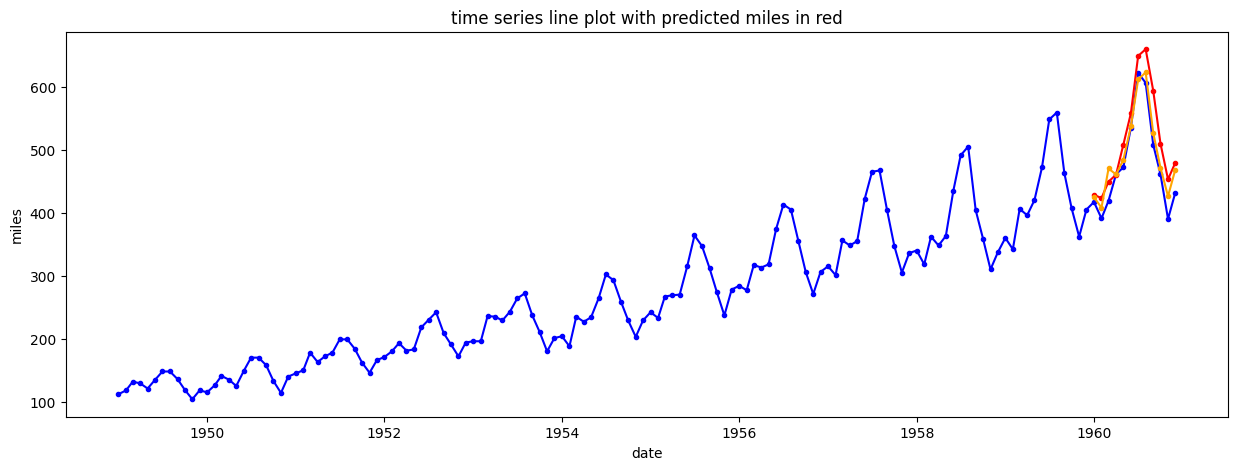

In [190]:
# plot time series with predictions
plt.figure(figsize=(15,5))
# simple line plot
plt.plot(df['date'],df['miles'], 
         marker='.', color='blue')
plt.plot(p_df.index, p_df['predicted_miles'],
         marker='.', color='red')
plt.plot(predictions_df.index, predictions_df['predicted_miles'],
         marker='.', color='orange')
plt.title('time series line plot with predicted miles in red')
plt.xlabel('date')
plt.ylabel('miles')
plt.show()

In [191]:
# calculate the differences between p_df and predictions_df
# merge the DataFrames on the 'date' column
merged_df = pd.merge(p_df, predictions_df, on='date', how='outer')
# calculate the difference between the miles columns
merged_df['diff'] = merged_df['predicted_miles_x'] - merged_df['predicted_miles_y']

In [192]:
merged_df

,predicted_miles_x,predicted_miles_y,diff
date,,,
1960-01-01,428.319953,424.568470,3.751483
1960-02-01,423.238799,408.022644,15.216156
1960-03-01,449.263848,470.202188,-20.938340
1960-04-01,460.430884,460.648289,-0.217405
1960-05-01,507.986678,483.775058,24.211620
1960-06-01,557.729154,536.857960,20.871194
1960-07-01,648.877933,611.608566,37.269367
1960-08-01,659.470893,622.663420,36.807473
1960-09-01,593.731954,526.847037,66.884917
